In [1]:
from gait_analysis import CasiaDataset, settings
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

/Users/ari/anaconda3/envs/gait_36/lib/python3.6/site-packages/lml/loader.py:64: UserWarning: Deprecated! since version 0.0.3. Please use scan_plugins_regex!
  "Deprecated! since version 0.0.3. Please use scan_plugins_regex!"


## Loading the dataset

In [2]:
datasets = CasiaDataset()
item = datasets[1]
annotations = item['annotations']
scenes = item['scenes']

loading configuration  default


In [3]:
datasets.dataset_items[1]

(1, 'bg-02')

## Verification
This data set correspond to the **person 001**, **subsequence bg-02** and **angle 90** because the default configuration is 90 degrees for grouping **'person_sequence'**

In [4]:
annotations.head(10)

,frame_id,left_foot,right_foot
40,40,IN_THE_AIR,ON_GROUND
41,41,IN_THE_AIR,ON_GROUND
42,42,IN_THE_AIR,ON_GROUND
43,43,IN_THE_AIR,ON_GROUND
44,44,IN_THE_AIR,ON_GROUND
45,45,ON_GROUND,ON_GROUND
46,46,ON_GROUND,ON_GROUND
47,47,ON_GROUND,ON_GROUND
48,48,ON_GROUND,IN_THE_AIR
49,49,ON_GROUND,IN_THE_AIR


We verify the transition are correct for the right foot at 44 to 45 and for the left foot at 47 to 48

left foot trans from air to ground


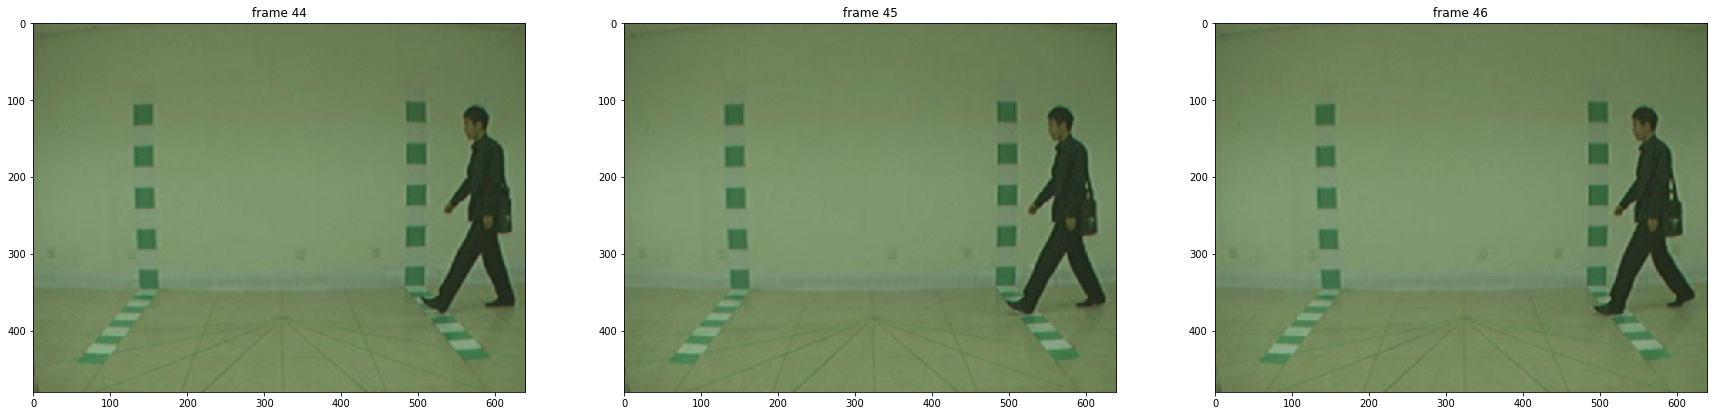

right foot trans from Ground to air


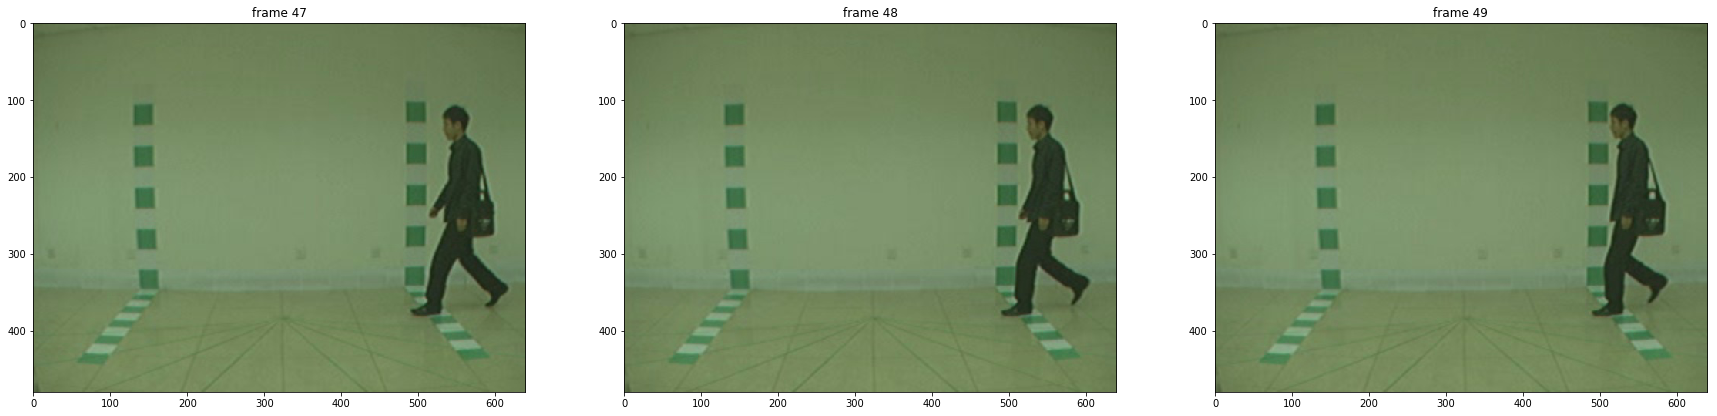

In [5]:
plt.figure(figsize=(30,40))
print('left foot trans from air to ground')
plt.subplot(131)
plt.imshow(scenes[4])
plt.title('frame 44')
plt.subplot(132)
plt.imshow(scenes[5])
plt.title('frame 45')
plt.subplot(133)
plt.imshow(scenes[6])
plt.title('frame 46')
plt.show()

plt.figure(figsize=(30,40))
print('right foot trans from Ground to air')
plt.subplot(131)
plt.imshow(scenes[7])
plt.title('frame 47')
plt.subplot(132)
plt.imshow(scenes[8])
plt.title('frame 48')
plt.subplot(133)
plt.imshow(scenes[9])
plt.title('frame 49')
plt.show()

Comment out bellow to get a view of the whole dataframe

In [6]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(annotations)

## Changing the configuration on fly

We can change the quickly the indexing to access all the angles

In [7]:
from gait_analysis.Config import Config
c = Config()
c.config['indexing']['grouping'] = 'person_sequence_angle'
dataset_2 = CasiaDataset()
item = dataset_2[1]
annotations = item['annotations']
scenes = item['scenes']

In [8]:
dataset_2.dataset_items[1]

(1, 'bg-01', 54)

In [9]:
annotations.head(15)

,frame_id,left_foot,right_foot
30,30,IN_THE_AIR,ON_GROUND
31,31,IN_THE_AIR,ON_GROUND
32,32,IN_THE_AIR,ON_GROUND
33,33,IN_THE_AIR,ON_GROUND
34,34,IN_THE_AIR,ON_GROUND
35,35,IN_THE_AIR,ON_GROUND
36,36,ON_GROUND,ON_GROUND
37,37,ON_GROUND,ON_GROUND
38,38,ON_GROUND,ON_GROUND
39,39,ON_GROUND,ON_GROUND


left foot trans from air to ground


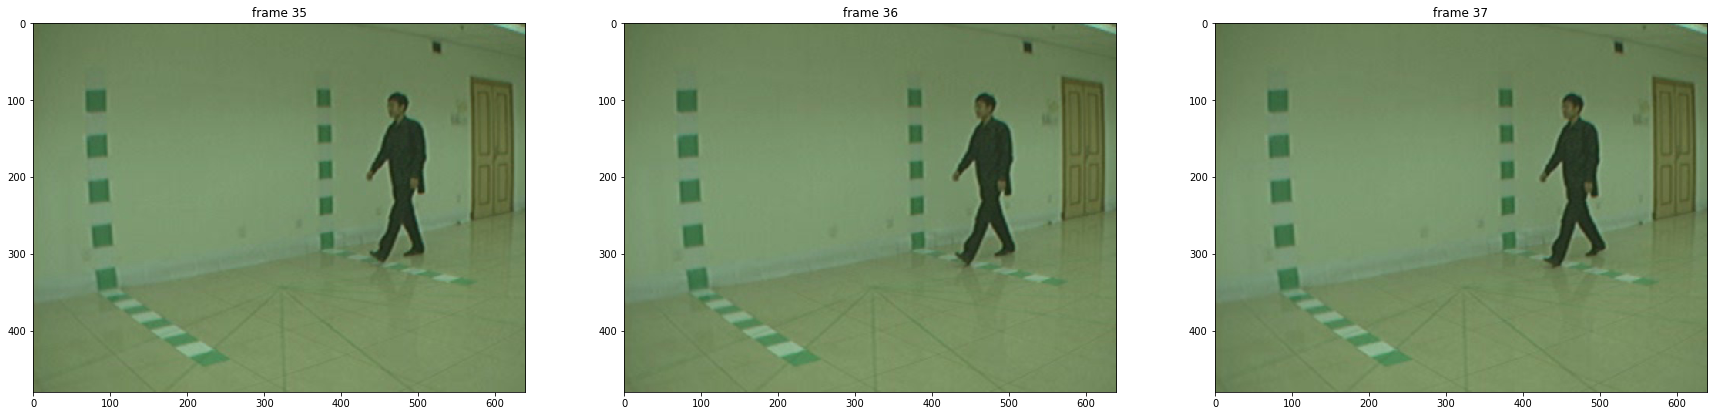

right foot trans from Ground to air


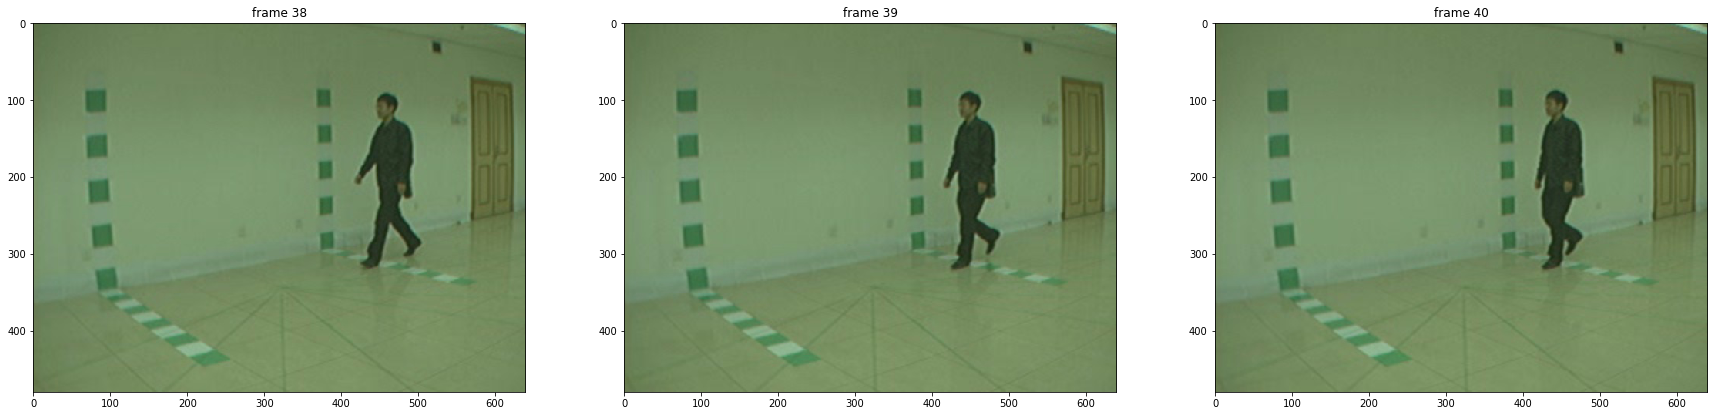

In [10]:
plt.figure(figsize=(30,40))
print('left foot trans from air to ground')
plt.subplot(131)
plt.imshow(scenes[5])
plt.title('frame 35')
plt.subplot(132)
plt.imshow(scenes[6])
plt.title('frame 36')
plt.subplot(133)
plt.imshow(scenes[7])
plt.title('frame 37')
plt.show()

plt.figure(figsize=(30,40))
print('right foot trans from Ground to air')
plt.subplot(131)
plt.imshow(scenes[8])
plt.title('frame 38')
plt.subplot(132)
plt.imshow(scenes[10])
plt.title('frame 39')
plt.subplot(133)
plt.imshow(scenes[11])
plt.title('frame 40')
plt.show()

We can change the loaded object configuration

In [11]:
c.config

{'indexing': {'selection': 'manual_people',
  'people_selection': [1],
  'sequences_selection': ['bg-01', 'cl-01'],
  'grouping': 'person_sequence_angle'},
 'pose': {'load': False,
  'preprocess': False,
  'D': 2,
  'body_keypoints_include_list': ['LAnkle',
   'RAnkle',
   'LKnee',
   'RKnee',
   'RHip',
   'LHip']},
 'flow': {'load': False,
  'preprocess': True,
  'method': 'dense',
  'load_patches': True,
  'patch_size': 5},
 'scenes': {'load': True,
  'preprocess': False,
  'gray_scale': False,
  'load_tracked': False,
  'sequences': ['bg', 'cl', 'nm'],
  'angles': [90]}}

In [12]:
c.config['pose']['load'] = True
c.config['flow']['load'] = True

In [14]:
dataset_3 = CasiaDataset()
item = dataset_3[1]
annotations = item['annotations']
scenes = item['scenes']
poses = item['poses']
valid_poses = item['valid_indices']
flows = item['flows']

left foot trans from air to ground


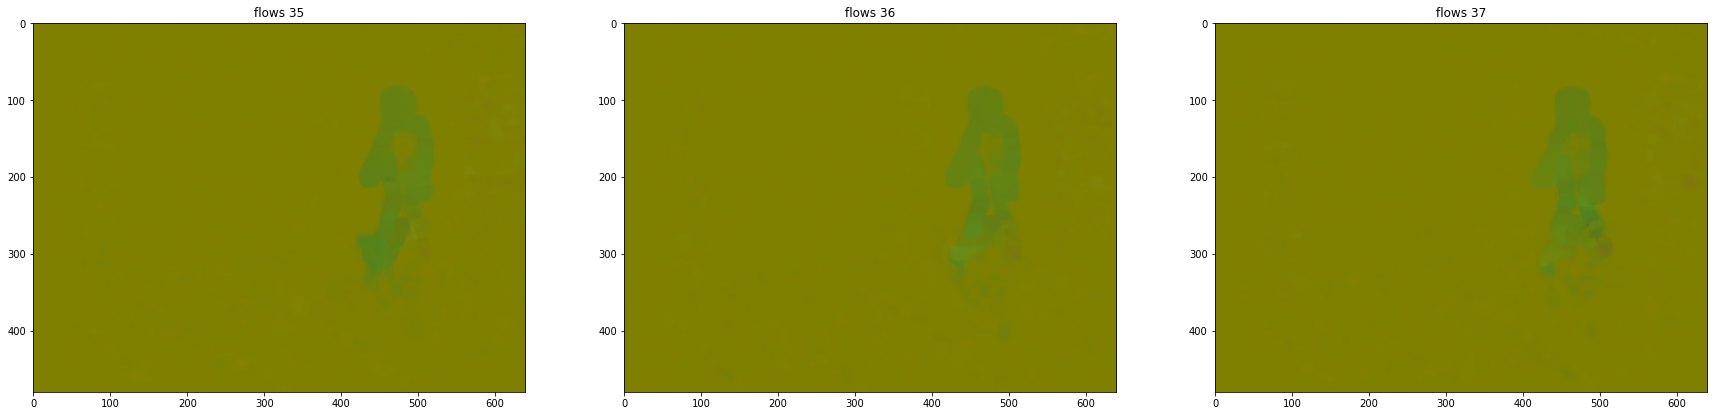

right foot trans from Ground to air


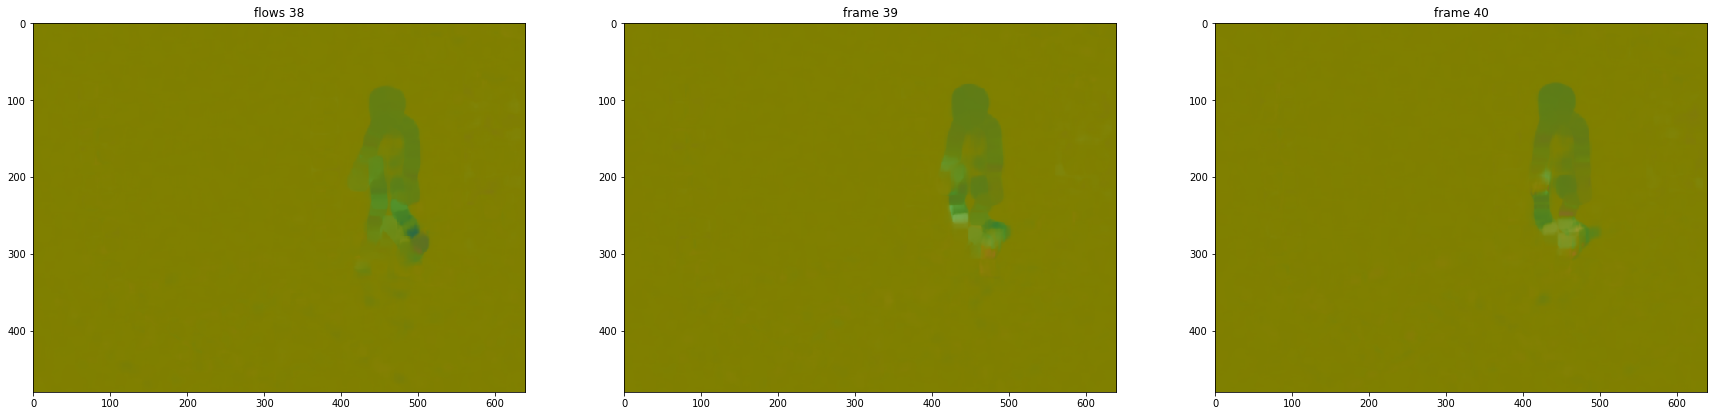

In [15]:
plt.figure(figsize=(30,40))
print('left foot trans from air to ground')
plt.subplot(131)
plt.imshow(flows[5])
plt.title('flows 35')
plt.subplot(132)
plt.imshow(flows[6])
plt.title('flows 36')
plt.subplot(133)
plt.imshow(flows[7])
plt.title('flows 37')
plt.show()

plt.figure(figsize=(30,40))
print('right foot trans from Ground to air')
plt.subplot(131)
plt.imshow(flows[8])
plt.title('flows 38')
plt.subplot(132)
plt.imshow(flows[10])
plt.title('frame 39')
plt.subplot(133)
plt.imshow(flows[11])
plt.title('frame 40')
plt.show()